In [186]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
# Read the dataset
df = pd.read_csv('airline_delay.csv')

# Display the first few rows of the dataset
print(df.head(10))


   year  month carrier       carrier_name airport  \
0  2020     12      9E  Endeavor Air Inc.     ABE   
1  2020     12      9E  Endeavor Air Inc.     ABY   
2  2020     12      9E  Endeavor Air Inc.     AEX   
3  2020     12      9E  Endeavor Air Inc.     AGS   
4  2020     12      9E  Endeavor Air Inc.     ALB   
5  2020     12      9E  Endeavor Air Inc.     ATL   
6  2020     12      9E  Endeavor Air Inc.     ATW   
7  2020     12      9E  Endeavor Air Inc.     AVL   
8  2020     12      9E  Endeavor Air Inc.     AZO   
9  2020     12      9E  Endeavor Air Inc.     BDL   

                                        airport_name  arr_flights  arr_del15  \
0  Allentown/Bethlehem/Easton, PA: Lehigh Valley ...         44.0        3.0   
1             Albany, GA: Southwest Georgia Regional         90.0        1.0   
2           Alexandria, LA: Alexandria International         88.0        8.0   
3        Augusta, GA: Augusta Regional at Bush Field        184.0        9.0   
4               

In [187]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3351 entries, 0 to 3350
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 3351 non-null   int64  
 1   month                3351 non-null   int64  
 2   carrier              3351 non-null   object 
 3   carrier_name         3351 non-null   object 
 4   airport              3351 non-null   object 
 5   airport_name         3351 non-null   object 
 6   arr_flights          3343 non-null   float64
 7   arr_del15            3343 non-null   float64
 8   carrier_ct           3343 non-null   float64
 9   weather_ct           3343 non-null   float64
 10  nas_ct               3343 non-null   float64
 11  security_ct          3343 non-null   float64
 12  late_aircraft_ct     3343 non-null   float64
 13  arr_cancelled        3343 non-null   float64
 14  arr_diverted         3343 non-null   float64
 15  arr_delay            3343 non-null   f

In [188]:
df.isna().sum() / df.shape[0]


year                   0.000000
month                  0.000000
carrier                0.000000
carrier_name           0.000000
airport                0.000000
airport_name           0.000000
arr_flights            0.002387
arr_del15              0.002387
carrier_ct             0.002387
weather_ct             0.002387
nas_ct                 0.002387
security_ct            0.002387
late_aircraft_ct       0.002387
arr_cancelled          0.002387
arr_diverted           0.002387
arr_delay              0.002387
carrier_delay          0.002387
weather_delay          0.002387
nas_delay              0.002387
security_delay         0.002387
late_aircraft_delay    0.002387
dtype: float64

In [189]:
print(df.describe())

              year   month   arr_flights    arr_del15   carrier_ct  \
count  3351.000000  3351.0   3343.000000  3343.000000  3343.000000   
mean   2019.459266    12.0    298.271014    50.995214    16.065337   
std       0.498412     0.0    852.436335   146.484456    41.759516   
min    2019.000000    12.0      1.000000     0.000000     0.000000   
25%    2019.000000    12.0     35.000000     5.000000     1.490000   
50%    2019.000000    12.0     83.000000    12.000000     4.750000   
75%    2020.000000    12.0    194.500000    33.000000    12.255000   
max    2020.000000    12.0  19713.000000  2289.000000   697.000000   

        weather_ct       nas_ct  security_ct  late_aircraft_ct  arr_cancelled  \
count  3343.000000  3343.000000  3343.000000       3343.000000    3343.000000   
mean      1.443144    16.183383     0.137320         17.166069       2.884535   
std       4.821657    56.423008     0.646479         55.447043      10.126658   
min       0.000000     0.000000     0.000000 

In [190]:
# Data exploration

print('Shape of the DataFrame (rows/columns):', df.shape)

Shape of the DataFrame (rows/columns): (3351, 21)


In [191]:
print('With Null Values:', df.shape)
df = df.dropna()
print('Without Null Values:', df.shape)

With Null Values: (3351, 21)
Without Null Values: (3343, 21)


In [192]:
# Trends over time
df_time = df[['year', 'month', 'arr_flights', 'arr_del15', 'arr_delay']].copy()
df_time.head(10)

,year,month,arr_flights,arr_del15,arr_delay
0,2020,12,44.0,3.0,89.0
1,2020,12,90.0,1.0,23.0
2,2020,12,88.0,8.0,338.0
3,2020,12,184.0,9.0,508.0
4,2020,12,76.0,11.0,692.0
5,2020,12,5985.0,445.0,30756.0
6,2020,12,142.0,14.0,436.0
7,2020,12,147.0,10.0,1070.0
8,2020,12,84.0,14.0,2006.0
9,2020,12,150.0,19.0,846.0


In [193]:
print(df.isnull().sum())

year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64


In [194]:
#percentage of deLayed flights
df_december_2019 = df_time[(df_time['year'] == 2019)]
df_december_2020 = df_time[(df_time['year'] == 2020)]

# Total number of flights and delayed flights for each year
total_flights_2019 = df_december_2019['arr_flights'].sum()
total_delays_2019 = df_december_2019['arr_del15'].sum()
total_flights_2020 = df_december_2020['arr_flights'].sum()
total_delays_2020 = df_december_2020['arr_del15'].sum()

# Percentage of delayed flights for each year
percentage_delayed_2019 = (total_delays_2019 / total_flights_2019) * 100
percentage_delayed_2020 = (total_delays_2020 / total_flights_2020) * 100

# Results
print(f"Percentage of Delayed Flights in 2019: {percentage_delayed_2019:.2f}%")
print(f"Percentage of Delayed Flights in 2020: {percentage_delayed_2020:.2f}%")

Percentage of Delayed Flights in 2019: 20.29%
Percentage of Delayed Flights in 2020: 11.72%


In [195]:
for column in df.select_dtypes(include=['object']).columns:
    print(f"\n{column}: {df[column].unique()}")


carrier: ['9E' 'AA' 'AS' 'B6' 'DL' 'F9' 'G4' 'HA' 'MQ' 'NK' 'OH' 'OO' 'YX' 'UA'
 'WN' 'YV' 'EV']

carrier_name: ['Endeavor Air Inc.' 'American Airlines Inc.' 'Alaska Airlines Inc.'
 'JetBlue Airways' 'Delta Air Lines Inc.' 'Frontier Airlines Inc.'
 'Allegiant Air' 'Hawaiian Airlines Inc.' 'Envoy Air' 'Spirit Air Lines'
 'PSA Airlines Inc.' 'SkyWest Airlines Inc.' 'Republic Airline'
 'United Air Lines Inc.' 'Southwest Airlines Co.' 'Mesa Airlines Inc.'
 'ExpressJet Airlines LLC']

airport: ['ABE' 'ABY' 'AEX' 'AGS' 'ALB' 'ATL' 'ATW' 'AVL' 'AZO' 'BDL' 'BHM' 'BIS'
 'BMI' 'BNA' 'BOS' 'BQK' 'BTR' 'BTV' 'BUF' 'BWI' 'CAE' 'CHA' 'CHO' 'CHS'
 'CID' 'CLE' 'CLT' 'CMH' 'CRW' 'CSG' 'CVG' 'CWA' 'DAL' 'DAY' 'DCA' 'DFW'
 'DHN' 'DLH' 'DSM' 'DTW' 'ECP' 'ELM' 'EVV' 'EWR' 'FAR' 'FAY' 'FLL' 'FSD'
 'FWA' 'GFK' 'GNV' 'GPT' 'GRB' 'GRR' 'GSO' 'GSP' 'GTR' 'HOU' 'HSV' 'IAD'
 'ICT' 'ILM' 'IND' 'JAN' 'JAX' 'JFK' 'LAN' 'LEX' 'LFT' 'LGA' 'LIT' 'MBS'
 'MCI' 'MCO' 'MDT' 'MEM' 'MGM' 'MIA' 'MKE' 'MLI' 'MLU' 'MOB' 'MOT' 

In [196]:
for column in df.select_dtypes(include=['object']).columns:
    print(f"\n{column}: {df[column].unique()}")


carrier: ['9E' 'AA' 'AS' 'B6' 'DL' 'F9' 'G4' 'HA' 'MQ' 'NK' 'OH' 'OO' 'YX' 'UA'
 'WN' 'YV' 'EV']

carrier_name: ['Endeavor Air Inc.' 'American Airlines Inc.' 'Alaska Airlines Inc.'
 'JetBlue Airways' 'Delta Air Lines Inc.' 'Frontier Airlines Inc.'
 'Allegiant Air' 'Hawaiian Airlines Inc.' 'Envoy Air' 'Spirit Air Lines'
 'PSA Airlines Inc.' 'SkyWest Airlines Inc.' 'Republic Airline'
 'United Air Lines Inc.' 'Southwest Airlines Co.' 'Mesa Airlines Inc.'
 'ExpressJet Airlines LLC']

airport: ['ABE' 'ABY' 'AEX' 'AGS' 'ALB' 'ATL' 'ATW' 'AVL' 'AZO' 'BDL' 'BHM' 'BIS'
 'BMI' 'BNA' 'BOS' 'BQK' 'BTR' 'BTV' 'BUF' 'BWI' 'CAE' 'CHA' 'CHO' 'CHS'
 'CID' 'CLE' 'CLT' 'CMH' 'CRW' 'CSG' 'CVG' 'CWA' 'DAL' 'DAY' 'DCA' 'DFW'
 'DHN' 'DLH' 'DSM' 'DTW' 'ECP' 'ELM' 'EVV' 'EWR' 'FAR' 'FAY' 'FLL' 'FSD'
 'FWA' 'GFK' 'GNV' 'GPT' 'GRB' 'GRR' 'GSO' 'GSP' 'GTR' 'HOU' 'HSV' 'IAD'
 'ICT' 'ILM' 'IND' 'JAN' 'JAX' 'JFK' 'LAN' 'LEX' 'LFT' 'LGA' 'LIT' 'MBS'
 'MCI' 'MCO' 'MDT' 'MEM' 'MGM' 'MIA' 'MKE' 'MLI' 'MLU' 'MOB' 'MOT' 

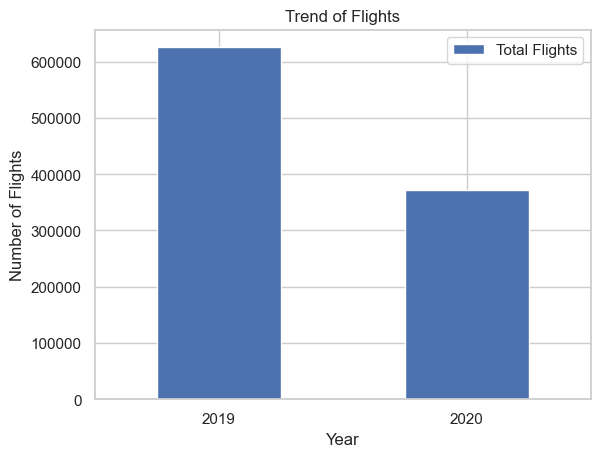

In [197]:
# flight per year
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('airline_delay.csv')
flight_trend = df.groupby(['year'])['arr_flights'].sum().plot(kind='bar')
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.ylabel('Number of Flights')
plt.title('Trend of Flights')
plt.legend(['Total Flights'])
plt.grid(True)
plt.show()


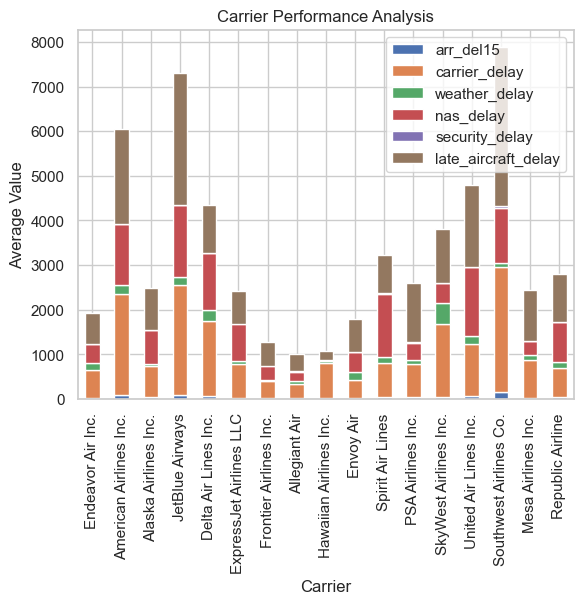

In [198]:
# Carrier Performance Analysis
cols = ['carrier', 'carrier_name', 'arr_del15', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
df = df[cols]

carrier_performance = df.groupby(['carrier', 'carrier_name']).mean().reset_index()
carrier_performance.plot(x='carrier_name', kind='bar', stacked=True)
plt.xlabel('Carrier')
plt.ylabel('Average Value')
plt.title('Carrier Performance Analysis')
plt.legend(loc='upper right')
plt.show()

C:\Users\S\AppData\Local\Temp\ipykernel_5900\1374374317.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Percentage of Delayed Flights', data=df_percentages, palette="plasma")


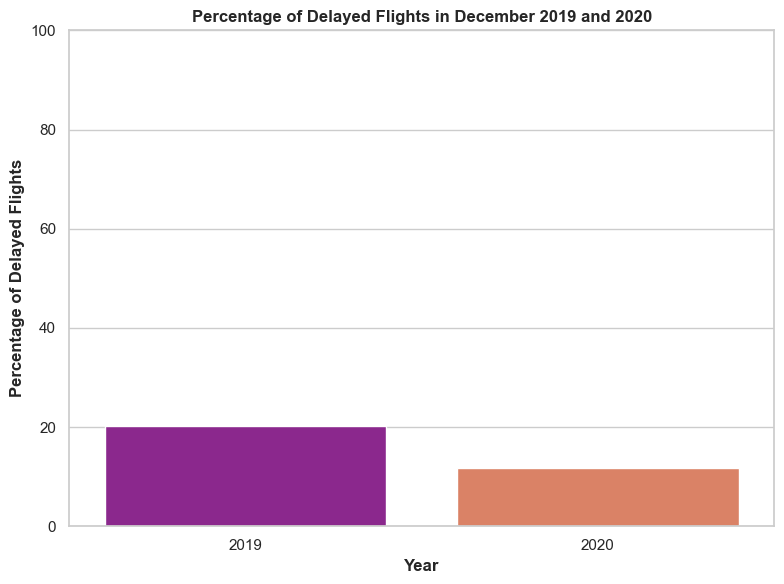

In [199]:
data = {'Year': [2019, 2020], 'Percentage of Delayed Flights': [percentage_delayed_2019, percentage_delayed_2020]}
df_percentages = pd.DataFrame(data)

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x='Year', y='Percentage of Delayed Flights', data=df_percentages, palette="plasma")
plt.title('Percentage of Delayed Flights in December 2019 and 2020', fontweight = 'bold')
plt.xlabel('Year', fontweight = 'bold')
plt.ylabel('Percentage of Delayed Flights', fontweight = 'bold')
plt.ylim(0, 100)  

plt.tight_layout()
plt.show()

In [200]:
import pandas as pd

# Reload your dataset
df = pd.read_csv('airline_delay.csv')

# Print all column names
for column in df.columns:
    print(column)

year
month
carrier
carrier_name
airport
airport_name
arr_flights
arr_del15
carrier_ct
weather_ct
nas_ct
security_ct
late_aircraft_ct
arr_cancelled
arr_diverted
arr_delay
carrier_delay
weather_delay
nas_delay
security_delay
late_aircraft_delay


Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')


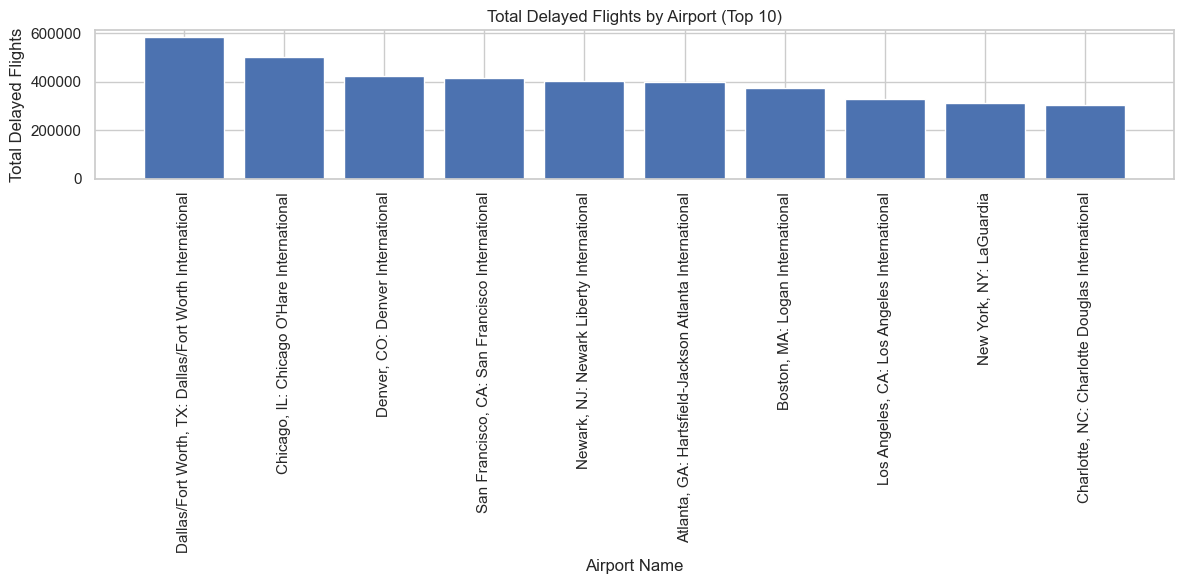

In [201]:
# df.columns = df.columns.str.strip()
print(df.columns)
# flights delayed by airport
airport_summary = df.groupby(['airport', 'airport_name']).agg(
    total_arrivals=('arr_flights', 'sum'),
    total_delay_time=('arr_delay', 'sum'),
    avg_carrier_delay=('carrier_delay', 'mean'),
    avg_weather_delay=('weather_delay', 'mean'),
    avg_nas_delay=('nas_delay', 'mean'),
    avg_security_delay=('security_delay', 'mean'),
    avg_late_aircraft_delay=('late_aircraft_delay', 'mean')
).reset_index().sort_values(by='total_delay_time', ascending=False)

# top 10 airports with the most delayed flights
top_10_airports = airport_summary.head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_airports['airport_name'], top_10_airports['total_delay_time'])
plt.title('Total Delayed Flights by Airport (Top 10)')
plt.xlabel('Airport Name')
plt.ylabel('Total Delayed Flights')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

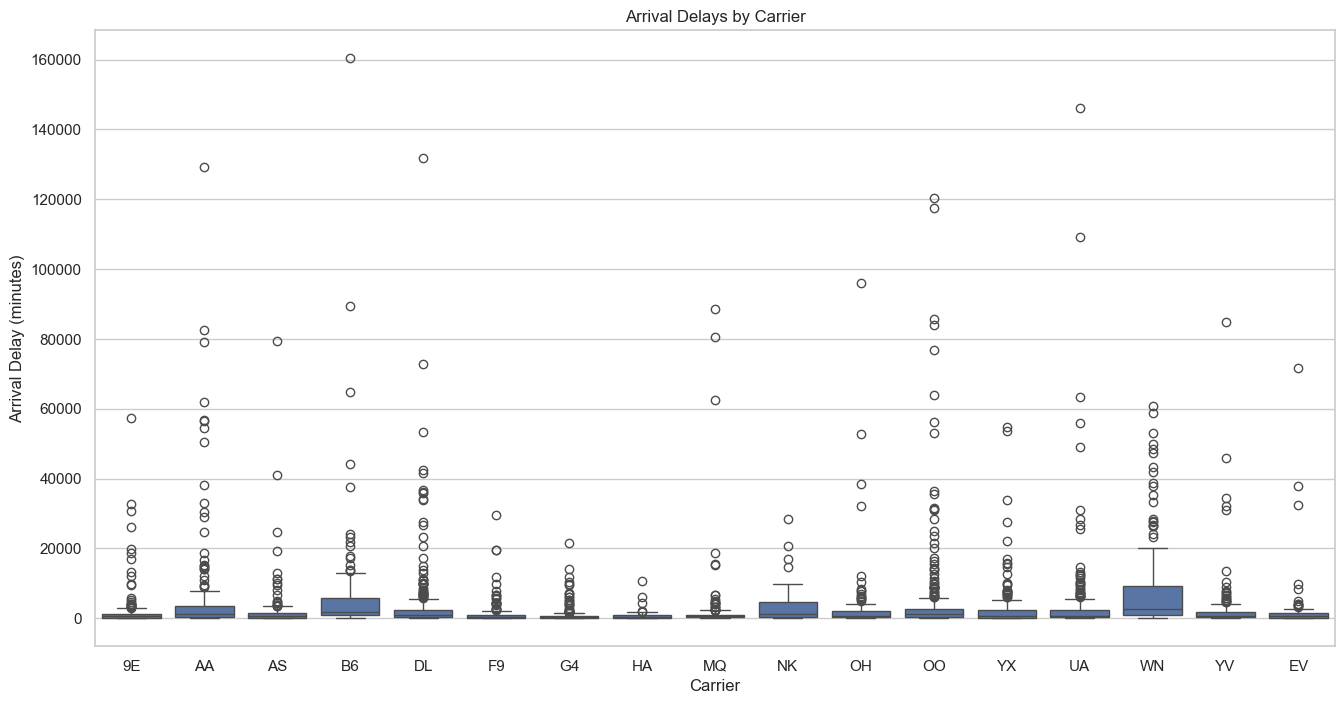

In [202]:
# Explore delays by carrier
plt.figure(figsize=(16, 8))
sns.boxplot(x='carrier', y='arr_delay', data=df)
plt.title('Arrival Delays by Carrier')
plt.xlabel('Carrier')
plt.ylabel('Arrival Delay (minutes)')
plt.show()


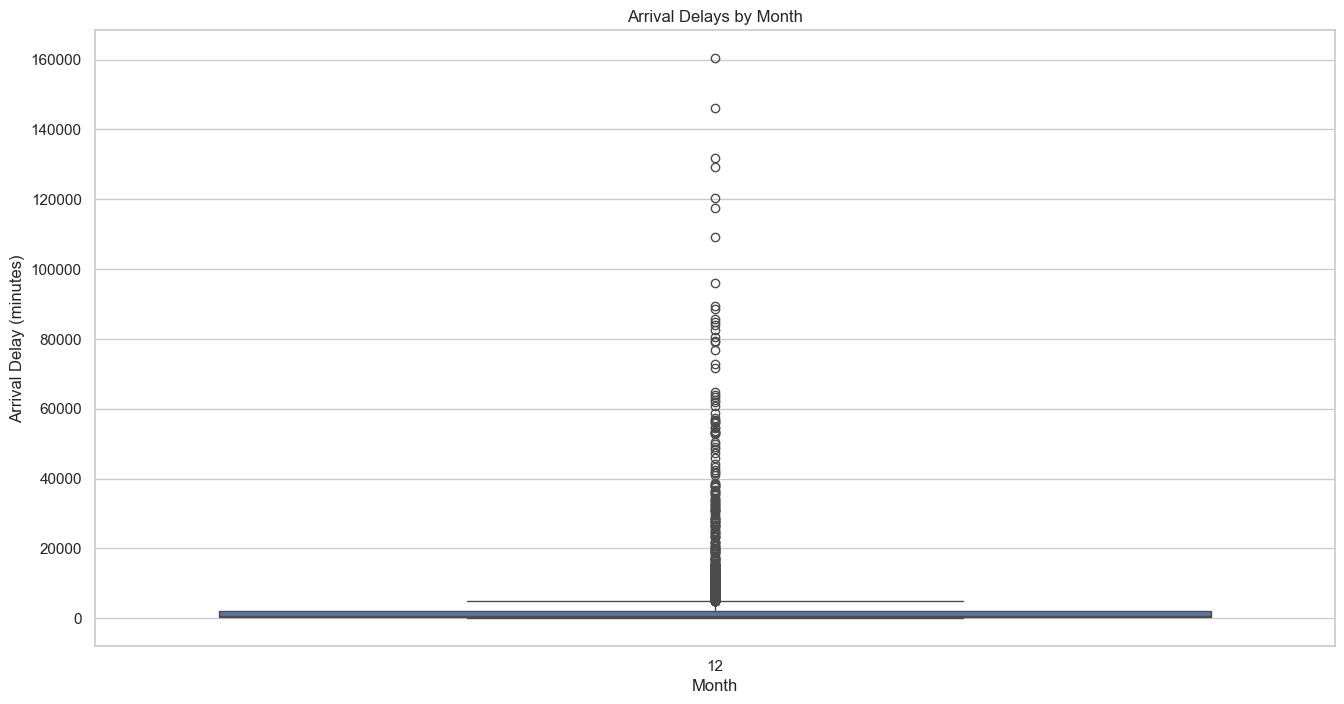

In [203]:
# delays by month
plt.figure(figsize=(16, 8))
sns.boxplot(x='month', y='arr_delay', data=df)
plt.title('Arrival Delays by Month')
plt.xlabel('Month')
plt.ylabel('Arrival Delay (minutes)')
plt.show()

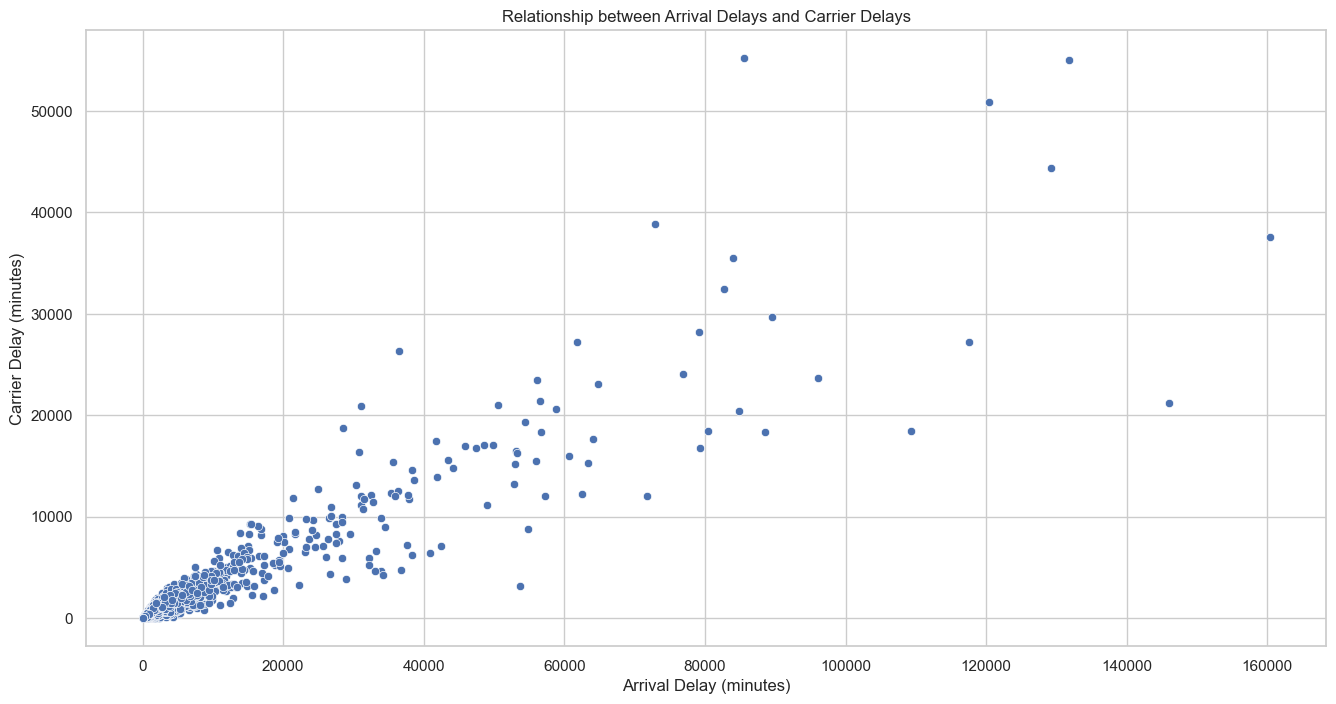

In [204]:
#Relationship between Arrival Delays and Carrier Delays
plt.figure(figsize=(16, 8))
sns.scatterplot(x='arr_delay', y='carrier_delay', data=df)
plt.title('Relationship between Arrival Delays and Carrier Delays')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Carrier Delay (minutes)')
plt.show()

In [205]:
# total delay time in hours
total_delay_2019_hours = df_time[df_time['year'] == 2019]['arr_delay'].sum() / 60
print(f'Total delay time in 2019: {int(total_delay_2019_hours)} hours')

total_delay_2020_hours = df_time[df_time['year'] == 2020]['arr_delay'].sum() / 60
print(f'Total delay time in 2020: {int(total_delay_2020_hours)} hours')

Total delay time in 2019: 143073 hours
Total delay time in 2020: 42678 hours


C:\Users\S\AppData\Local\Temp\ipykernel_5900\202855358.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Total Delay (Hours)', data=df_delay, palette="viridis")


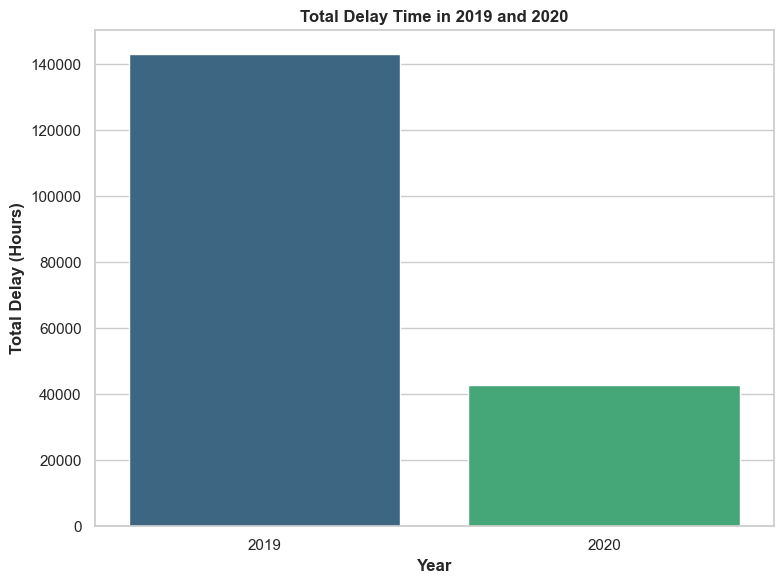

In [206]:
# delay time plotting
data_delay = {'Year': [2019, 2020], 'Total Delay (Hours)': [total_delay_2019_hours, total_delay_2020_hours]}
df_delay = pd.DataFrame(data_delay)

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x='Year', y='Total Delay (Hours)', data=df_delay, palette="viridis")
plt.title('Total Delay Time in 2019 and 2020', fontweight='bold')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Total Delay (Hours)', fontweight='bold')

plt.tight_layout()
plt.show()

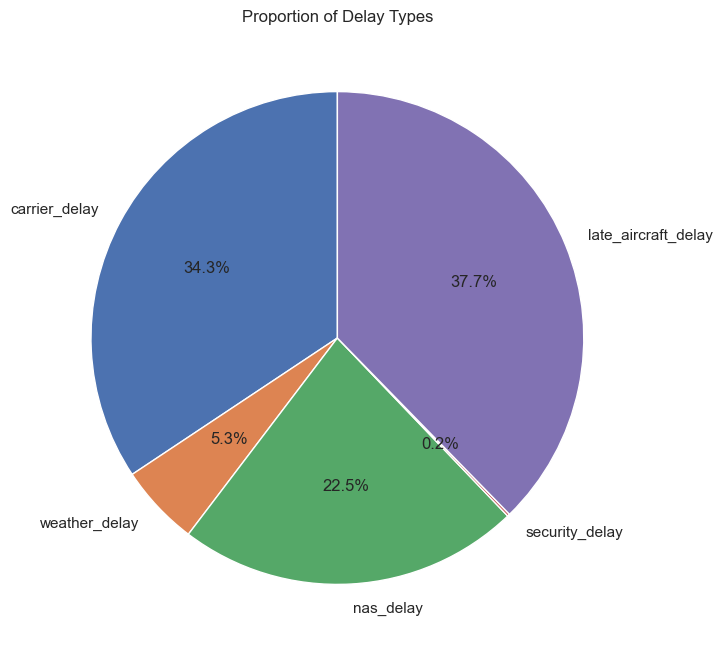

In [207]:
#Proportion of Delay Types
delay_columns = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']

df_delay_types = df[delay_columns].sum()

plt.figure(figsize=(12, 8))
df_delay_types.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Delay Types')
plt.show()

<Figure size 1600x800 with 0 Axes>

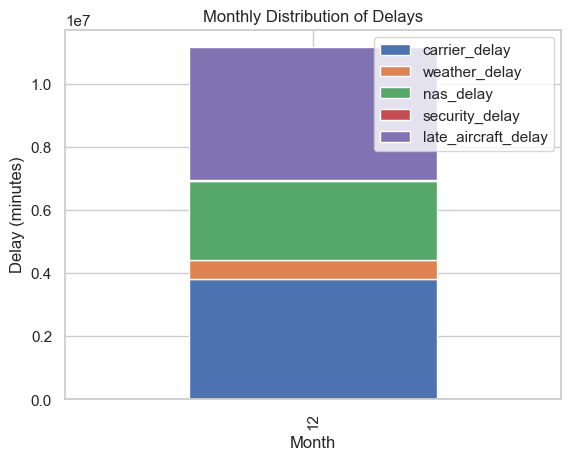

In [208]:
#Monthly Distribution of Delays
monthly_delays = df.groupby('month')[delay_columns].sum()

plt.figure(figsize=(16, 8))
monthly_delays.plot(kind='bar', stacked=True)
plt.title('Monthly Distribution of Delays')
plt.xlabel('Month')
plt.ylabel('Delay (minutes)')
plt.show()

C:\Users\S\AppData\Local\Temp\ipykernel_5900\1297146419.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='arr_delay', y='airport', data=df[df['airport'].isin(top_airports)], ci=None)


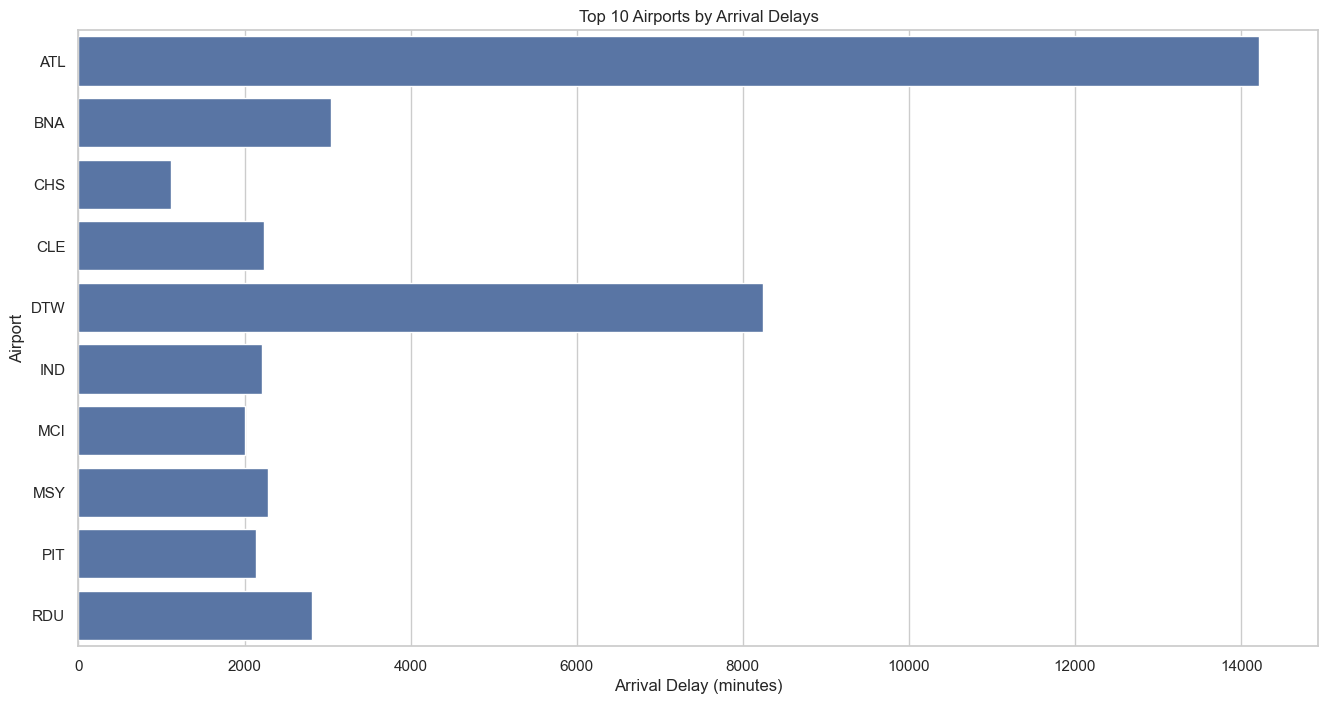

In [209]:
#Airport-wise Delays
top_airports = df['airport'].value_counts().head(10).index

plt.figure(figsize=(16, 8))
sns.barplot(x='arr_delay', y='airport', data=df[df['airport'].isin(top_airports)], ci=None)
plt.title('Top 10 Airports by Arrival Delays')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Airport')
plt.show()

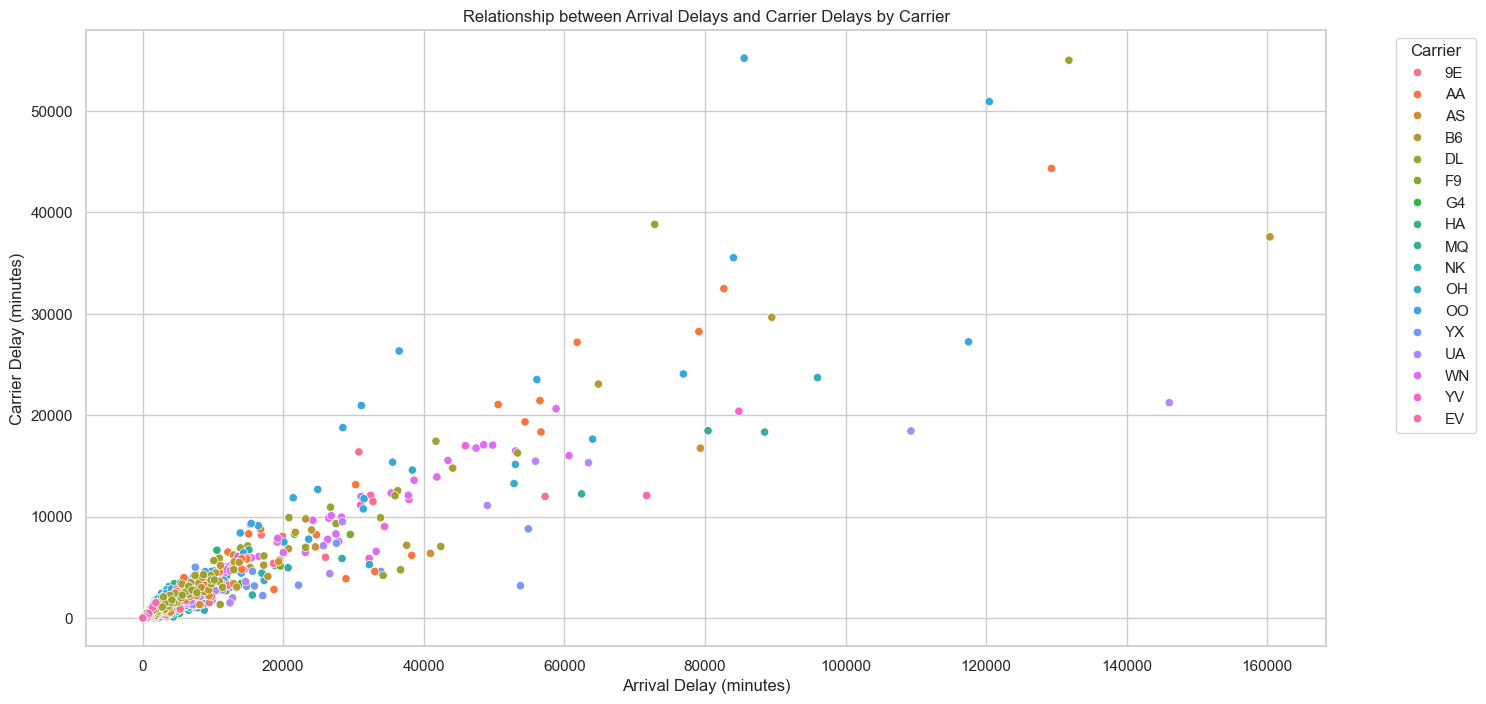

In [210]:
#Relationship between Carrier Delays and Arrival Delays
plt.figure(figsize=(16, 8))
sns.scatterplot(x='arr_delay', y='carrier_delay', hue='carrier', data=df)
plt.title('Relationship between Arrival Delays and Carrier Delays by Carrier')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Carrier Delay (minutes)')
plt.legend(title='Carrier', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

C:\Users\S\AppData\Local\Temp\ipykernel_5900\3061503177.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='arr_delay', y='airport', data=df[df['airport'].isin(top_airports)], ci=None)


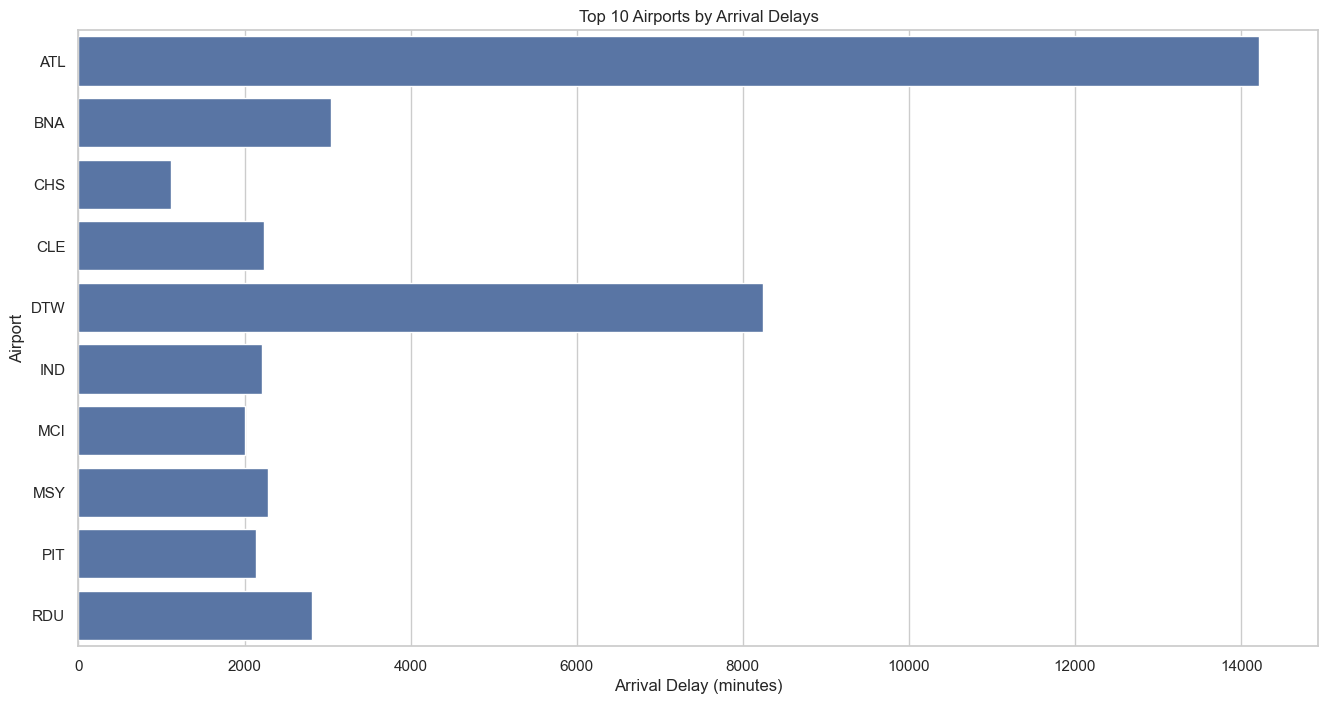

In [211]:
#Airport-wise Delays
plt.figure(figsize=(16, 8))
sns.barplot(x='arr_delay', y='airport', data=df[df['airport'].isin(top_airports)], ci=None)
plt.title('Top 10 Airports by Arrival Delays')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Airport')
plt.show()

In [212]:
df_delay = df[['weather_delay', 'security_delay', 'nas_delay', 'late_aircraft_delay']].copy()
display(df_delay)

,weather_delay,security_delay,nas_delay,late_aircraft_delay
0,0.0,0.0,3.0,30.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,45.0,28.0
3,0.0,0.0,92.0,224.0
4,0.0,0.0,178.0,116.0
...,...,...,...,...
3346,19.0,0.0,135.0,34.0
3347,25.0,0.0,200.0,139.0
3348,46.0,0.0,50.0,0.0
3349,0.0,0.0,23.0,0.0


In [213]:
#Carrier Performance
df_carr = df[['carrier_name', 'arr_flights', 'arr_del15', 'arr_delay']].copy()
carrier_groups = df_carr.groupby('carrier_name')
carr_metrix = carrier_groups.agg({'arr_del15': 'sum','arr_delay': 'sum','arr_flights': 'sum'})


In [214]:
# Percentage of delayed flights
carr_metrix['Percentage_Delayed'] = (carr_metrix['arr_del15'] / carr_metrix['arr_flights']) * 100

# Average delay time
carr_metrix['Average_Delay_Time'] = carr_metrix['arr_delay'] / carr_metrix['arr_del15']

# Ranked df (based on percentage of delayed flights)
carrier_ranking = carr_metrix.sort_values(by='Percentage_Delayed', ascending=False)
carrier_ranking = pd.DataFrame(carrier_ranking)

display(carrier_ranking)

,arr_del15,arr_delay,arr_flights,Percentage_Delayed,Average_Delay_Time
carrier_name,,,,,
JetBlue Airways,10363.0,864790.0,36181.0,28.642105,83.449773
ExpressJet Airlines LLC,2694.0,254148.0,11203.0,24.047130,94.338530
Mesa Airlines Inc.,6359.0,530595.0,30502.0,20.847813,83.440006
Allegiant Air,3480.0,240714.0,16749.0,20.777360,69.170690
Alaska Airlines Inc.,6294.0,351035.0,33001.0,19.072149,55.772958
Frontier Airlines Inc.,3654.0,232696.0,19587.0,18.655231,63.682540
PSA Airlines Inc.,7162.0,479952.0,38567.0,18.570280,67.013683
Envoy Air,8070.0,505165.0,43914.0,18.376827,62.597893
United Air Lines Inc.,13498.0,903789.0,77183.0,17.488307,66.957253


C:\Users\S\AppData\Local\Temp\ipykernel_5900\690605169.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=carrier_ranking.index, y=carrier_ranking['Percentage_Delayed'], palette = 'Accent')


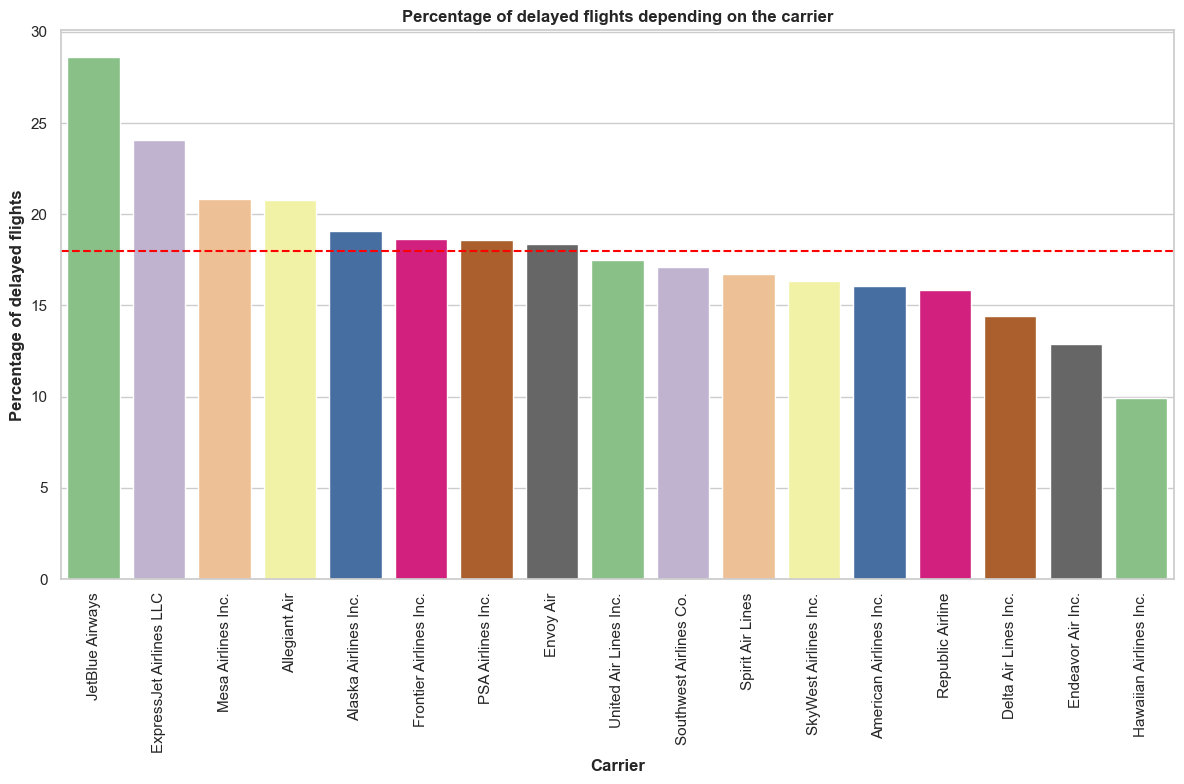

Mean Percentage of delayed flights: 17.98


In [215]:
#Delayed flights depending on the carrier
plt.figure(figsize = (12,8))
sns.barplot(x=carrier_ranking.index, y=carrier_ranking['Percentage_Delayed'], palette = 'Accent')

# Horizontal line (overall average)
mean_perc_del = carrier_ranking['Percentage_Delayed'].mean()
plt.axhline(y=mean_perc_del, color='red', linestyle='--', label=f'Mean: {mean_perc_del:.2f}')


plt.title('Percentage of delayed flights depending on the carrier', fontweight = 'bold')
plt.ylabel('Percentage of delayed flights', fontweight = 'bold')
plt.xlabel('Carrier', fontweight = 'bold')

plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()
print('Mean Percentage of delayed flights:', carrier_ranking['Percentage_Delayed'].mean().round(2))

C:\Users\S\AppData\Local\Temp\ipykernel_5900\2715353739.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=carrier_ranking.index, y=carrier_ranking['Average_Delay_Time'], palette = 'husl')


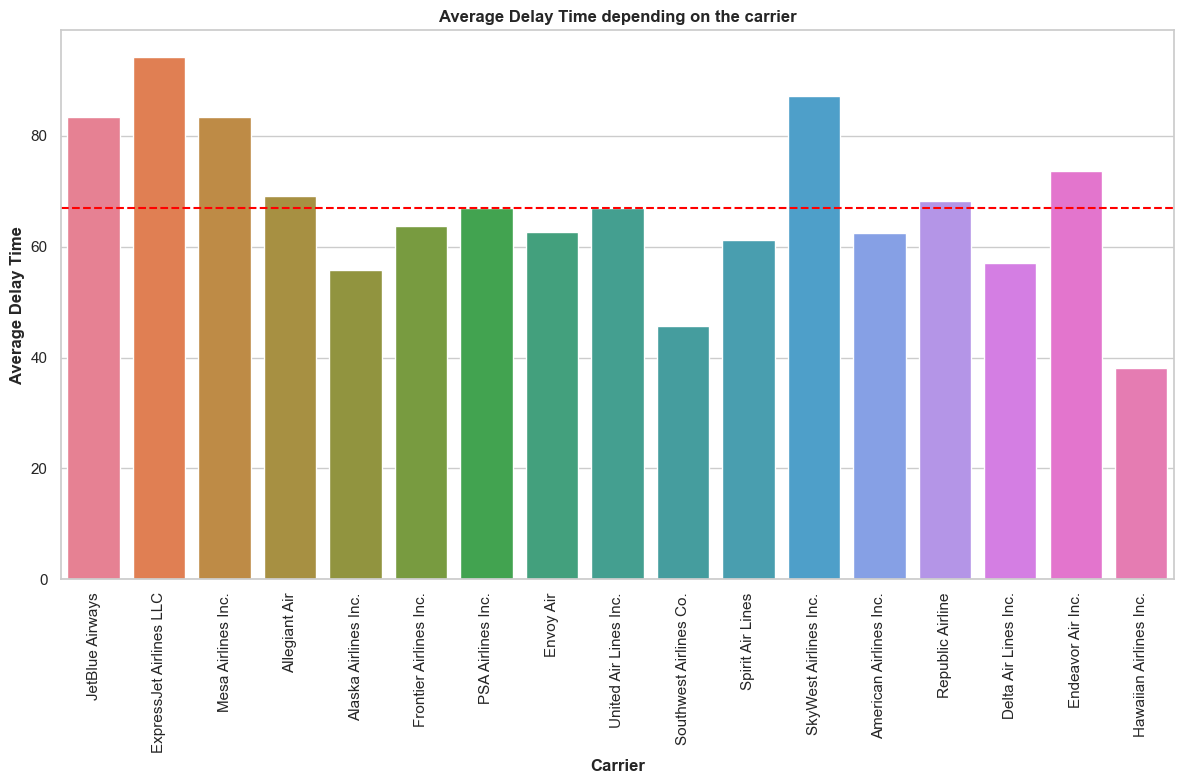

Overall Average Delay Time: 67.07


In [216]:
#overall career delay time
plt.figure(figsize = (12,8))

sns.barplot(x=carrier_ranking.index, y=carrier_ranking['Average_Delay_Time'], palette = 'husl')
plt.xticks(rotation = 90)

# Horizontal line (overall average)
mean_avg_delay_time = carrier_ranking['Average_Delay_Time'].mean()
plt.axhline(y=mean_avg_delay_time, color='red', linestyle='--', label=f'Mean: {mean_avg_delay_time:.2f}')

plt.title('Average Delay Time depending on the carrier', fontweight = 'bold')
plt.ylabel('Average Delay Time', fontweight = 'bold')
plt.xlabel('Carrier', fontweight = 'bold')

plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

print('Overall Average Delay Time:', carrier_ranking['Average_Delay_Time'].mean().round(2))

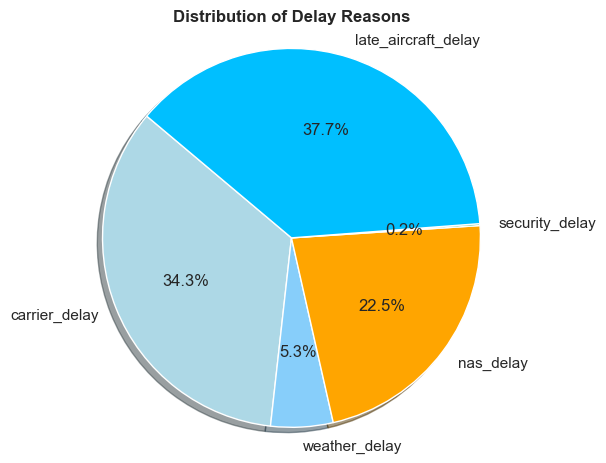

late_aircraft_delay    4200591
carrier_delay          3826943
nas_delay              2505844
weather_delay           593688
security_delay           18055
dtype: int32

In [217]:
# Dealy reason Piechart
delay_reasons = df[delay_columns].sum()
labels = delay_reasons.index  # Assuming delay reasons are the index of delay_reasons DataFrame
sizes = delay_reasons
colors = ['lightblue', 'lightskyblue', 'orange', 'mediumseagreen', 'deepskyblue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of Delay Reasons', fontweight='bold')
plt.axis('equal')

plt.tight_layout()
plt.show()

display(delay_reasons.sort_values(ascending=False).astype(int))


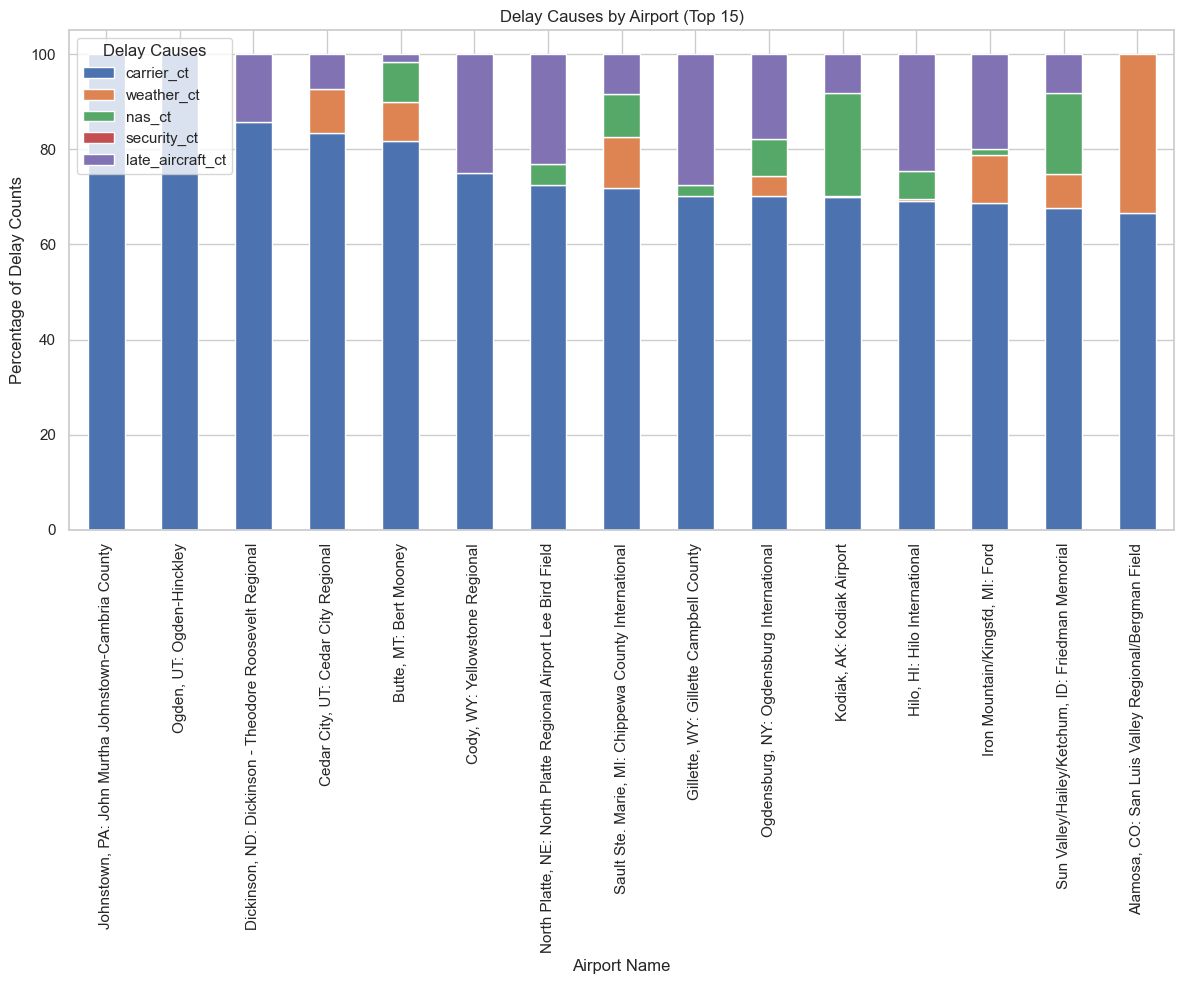

In [218]:

# delay cause analysis
delay_cause_data = df[['airport_name', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']]

# Group by airport_name and calculate the sum of each delay cause
delay_cause_totals = delay_cause_data.groupby('airport_name').sum()

# Normalize the data to express values as percentages
delay_cause_percentages = delay_cause_totals.div(delay_cause_totals.sum(axis=1), axis=0) * 100

# Select the top 15 airports
top_15_airports = delay_cause_percentages.nlargest(15, 'carrier_ct')

# Plot the stacked bar chart
top_15_airports.plot(kind='bar', stacked=True, figsize=(12, 10))
plt.title('Delay Causes by Airport (Top 15)')
plt.xlabel('Airport Name')
plt.ylabel('Percentage of Delay Counts')
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend(title='Delay Causes')
plt.show()


In [219]:
print(df.columns)


Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')


Root Causes of Significant Delays:
carrier_ct          33170.61
weather_ct           2871.50
nas_ct              38986.61
security_ct           319.73
late_aircraft_ct    40346.56
dtype: float64


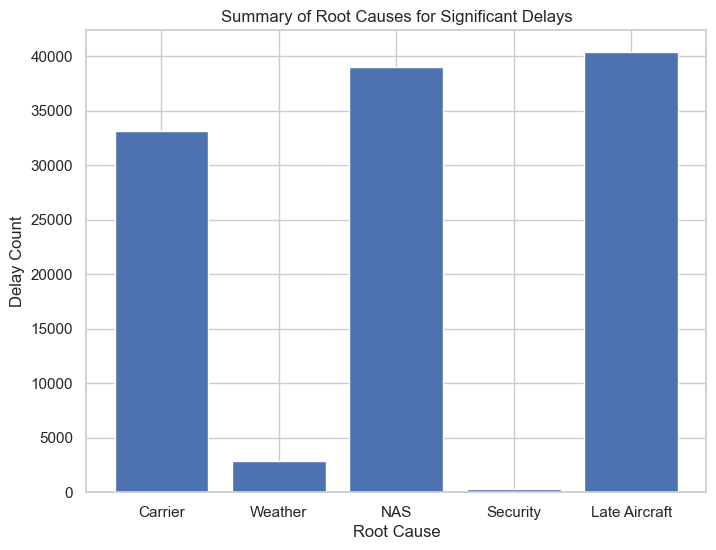

In [220]:
# main couses for significant delays
significant_delay_threshold = 100  

significant_delays = df[df['arr_del15'] > significant_delay_threshold]
root_cause_summary = significant_delays[['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']].sum()
print("Root Causes of Significant Delays:")
print(root_cause_summary)

# Convert the Series to a DataFrame for plotting
root_cause_df = root_cause_summary.reset_index()
root_cause_df.columns = ['Root Cause', 'Delay Count']

root_cause_categories = ['Carrier', 'Weather', 'NAS', 'Security', 'Late Aircraft']
root_cause_counts = root_cause_summary.values

plt.figure(figsize=(8, 6))
plt.bar(root_cause_categories, root_cause_counts)
plt.xlabel('Root Cause')
plt.ylabel('Delay Count')
plt.title('Summary of Root Causes for Significant Delays')
plt.show()

Splitting our data into training and testing

In [221]:
X=df.iloc[:,:-1]
X.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay
0,2020,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",44.0,3.0,1.63,0.0,0.12,0.0,1.25,0.0,1.0,89.0,56.0,0.0,3.0,0.0
1,2020,12,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",90.0,1.0,0.96,0.0,0.04,0.0,0.00,0.0,0.0,23.0,22.0,0.0,1.0,0.0
2,2020,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,8.0,5.75,0.0,1.60,0.0,0.65,0.0,1.0,338.0,265.0,0.0,45.0,0.0
3,2020,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",184.0,9.0,4.17,0.0,1.83,0.0,3.00,0.0,0.0,508.0,192.0,0.0,92.0,0.0
4,2020,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",76.0,11.0,4.78,0.0,5.22,0.0,1.00,1.0,0.0,692.0,398.0,0.0,178.0,0.0


In [222]:
Y=df.iloc[:,-1:]
Y.head()

,late_aircraft_delay
0,30.0
1,0.0
2,28.0
3,224.0
4,116.0


### Random Forest

In [223]:
from sklearn.metrics import classification_report, confusion_matrix

# Get the column names after one-hot encoding
encoded_columns = preprocessor.named_transformers_['onehot'].get_feature_names_out(categorical_columns)

# Create a DataFrame with encoded columns
xtrain_encoded_df = pd.DataFrame(xtrain_encoded, columns=encoded_columns)

# Feature importances
feature_importances = pd.Series(rfmodel.feature_importances_, index=xtrain_encoded_df.columns)
print("Feature Importances:")
print(feature_importances.sort_values(ascending=False))

# Confusion matrix and classification report
conf_matrix = confusion_matrix(ytest, predictions)
classification_rep = classification_report(ytest, predictions)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


ValueError: Length of values (569) does not match length of index (700)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# Assuming df is your DataFrame
# Replace df with the actual variable name in your code

# Drop rows with missing values in the target variable 'arr_del15'
df = df.dropna(subset=['arr_del15'])

# Selecting features and target variable
X = df.drop(['arr_del15'], axis=1)
Y = df['arr_del15']

# Split the data
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.33, random_state=42)

# Categorical columns
categorical_columns = ['carrier', 'carrier_name', 'airport', 'airport_name']

# Create a column transformer with OneHotEncoder for categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_columns)
    ],
    remainder='passthrough'
)

# Fit and transform the data
xtrain_encoded = preprocessor.fit_transform(xtrain)
xtest_encoded = preprocessor.transform(xtest)

# Initialize and train RandomForestClassifier
rfmodel = RandomForestClassifier(random_state=42)
rfmodel.fit(xtrain_encoded, ytrain)

# Make predictions on the test set
predictions = rfmodel.predict(xtest_encoded)

# Calculate accuracy
accuracy = accuracy_score(ytest, predictions)
print(f"Model Accuracy: {accuracy}")


c:\Users\S\miniconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Model Accuracy: 0.25815217391304346


In [ ]:
print("Unique values in ytrain:", ytrain.unique())


Unique values in ytrain: [3.900e+01 3.000e+00 1.210e+02 7.700e+01 9.000e+00 1.000e+01 1.300e+01
 4.100e+01 1.100e+01 1.000e+00 0.000e+00 1.600e+01 2.400e+01 1.350e+02
 4.000e+00 2.600e+01 8.000e+01 2.500e+01 7.000e+00 1.900e+01 4.110e+02
 5.300e+01 2.200e+01 1.200e+01 2.100e+01 7.400e+01 6.300e+01 1.066e+03
 4.000e+01 8.000e+00 6.000e+00 2.000e+00 1.700e+01 5.000e+00 5.900e+01
 6.500e+01 4.400e+01 4.800e+01 1.370e+02 2.700e+01 8.600e+01 1.800e+01
 5.200e+01 5.400e+01 3.000e+01 4.900e+01 3.300e+01 1.110e+02 5.500e+01
 2.800e+01 2.660e+02 8.400e+01 4.200e+01 3.800e+01 3.220e+02 3.400e+01
 3.100e+01 1.320e+02 1.880e+02 5.100e+01 1.500e+01 1.240e+02 9.200e+01
 1.400e+01 1.270e+02 2.000e+01 2.170e+02 6.800e+01 1.930e+02 4.500e+01
 7.460e+02 3.600e+01 7.900e+01 1.070e+02 6.000e+01 1.048e+03 1.420e+02
 9.500e+01 3.200e+01 1.187e+03 1.480e+02 7.600e+01 3.700e+01 5.700e+01
 1.090e+02 1.020e+02 9.600e+01 1.080e+02 3.500e+01 2.300e+01 8.800e+01
 9.600e+02 1.000e+02 2.120e+02 3.160e+02 2.640e+02 1

## RandomForestRegressor

In [ ]:
# categorical variable
categorical_columns = ['carrier', 'carrier_name', 'airport', 'airport_name']

# Use get_dummies to one-hot encode categorical columns for both train and test sets
xtrain_encoded = pd.get_dummies(xtrain, columns=categorical_columns)
xtest_encoded = pd.get_dummies(xtest, columns=categorical_columns)

# Ensure that both sets have the same columns
common_columns = list(set(xtrain_encoded.columns) & set(xtest_encoded.columns))
xtrain_encoded = xtrain_encoded[common_columns]
xtest_encoded = xtest_encoded[common_columns]

# Create an instance of the RandomForestRegressor
rfmodel = RandomForestRegressor()

# Train the model
rfmodel.fit(xtrain_encoded, ytrain)

# Make predictions on the test set
predictions = rfmodel.predict(xtest_encoded)

# Evaluate the model
mse = mean_squared_error(ytest, predictions)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 195.3991051630435


In [ ]:
# Feature importances
feature_importances = pd.Series(rfmodel.feature_importances_, index=xtrain_encoded.columns)
print("Feature Importances:")
# print top 10 important features 
print(feature_importances.sort_values(ascending=False).head(10))
# print(feature_importances.sort_values(ascending=False))

# Plot feature importances
# feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
# plt.title('Feature Importances')
# plt.xlabel('Features')
# plt.ylabel('Importance')
# plt.show()


Feature Importances:
arr_delay              0.757301
late_aircraft_ct       0.093416
carrier_ct             0.059870
nas_ct                 0.027322
late_aircraft_delay    0.020580
arr_flights            0.020299
carrier_delay          0.005196
arr_cancelled          0.003692
weather_ct             0.002949
nas_delay              0.001386
dtype: float64


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    # Add other hyperparameters as needed
}

# Perform Grid Search
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(xtrain_encoded, ytrain)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_rfmodel = grid_search.best_estimator_
best_rfmodel.fit(xtrain_encoded, ytrain)


Best Hyperparameters: {'max_depth': 20, 'n_estimators': 100}


RandomForestRegressor(max_depth=20)

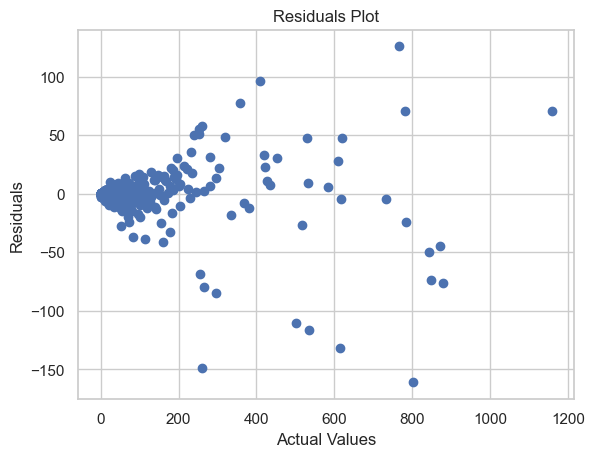

In [ ]:
residuals = ytest - predictions
plt.scatter(ytest, residuals)
plt.title('Residuals Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()


## linear regression

In [ ]:
df.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'airport_encoded'],
      dtype='object')

In [ ]:
from sklearn.linear_model import LinearRegression

# Create an instance of LinearRegression
lrmodel = LinearRegression()

# Train the model
lrmodel.fit(xtrain_encoded, ytrain)

# Make predictions on the test set
predictions = lrmodel.predict(xtest_encoded)

# Evaluate the model
mse = mean_squared_error(ytest, predictions)
print(f"Mean Squared Error: {mse}")



Mean Squared Error: 2.323082793993993e-05


In [230]:
# most important feature is arr_delay with a high importance value of 0.757301. so, considering predicting arr_delay as target variable.

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

# Assuming categorical_columns are your categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# 'arr_delay' is the column to predict
target_column = 'arr_delay'
X = df_encoded.drop(target_column, axis=1)
y = df_encoded[target_column]

# Impute missing values in X
imputer_X = SimpleImputer(strategy='mean')
X_imputed = imputer_X.fit_transform(X)

# Impute missing values in y
imputer_y = SimpleImputer(strategy='mean')
y_imputed = imputer_y.fit_transform(y.values.reshape(-1, 1)).ravel()

# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=42)

# Create an instance of the LinearRegression
lrmodel = LinearRegression()

# Train the model
lrmodel.fit(xtrain, ytrain)

# Make predictions on the test set
predictions = lrmodel.predict(xtest)

# Evaluate the model
mse = mean_squared_error(ytest, predictions)
print("Mean Squared Error:", mse)

from sklearn.metrics import r2_score

# Evaluating the model using R-squared
r2 = r2_score(ytest, predictions)
print("R-squared:", r2)



Mean Squared Error: 3.411629452412635e-19
R-squared: 1.0


In [242]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Drop rows with missing values in the target variable 'arr_del15'
df = df.dropna(subset=['arr_del15'])

# Assuming categorical_columns are your categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# 'arr_del15' is the column to predict
X = df_encoded.drop(['arr_del15'], axis=1)
Y = df_encoded['arr_del15']

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the scaled data
xtrain, xtest, ytrain, ytest = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

# Create an instance of LogisticRegression
logreg = LogisticRegression(max_iter=1000)

# Train the model
logreg.fit(xtrain, ytrain)

# Make predictions on the test set
predictions = logreg.predict(xtest)

# Calculate accuracy
accuracy = accuracy_score(ytest, predictions)
print(f"Model Accuracy: {accuracy}")

# Generate classification report
classification_rep = classification_report(ytest, predictions)
print("Classification Report:")
print(classification_rep)


Model Accuracy: 0.06278026905829596
Classification Report:
              precision    recall  f1-score   support

         0.0       0.18      0.17      0.18        40
         1.0       0.19      0.22      0.20        45
         2.0       0.10      0.17      0.12        29
         3.0       0.14      0.10      0.11        41
         4.0       0.09      0.10      0.09        31
         5.0       0.03      0.03      0.03        33
         6.0       0.04      0.05      0.05        20
         7.0       0.15      0.07      0.10        28
         8.0       0.15      0.24      0.18        17
         9.0       0.00      0.00      0.00        23
        10.0       0.11      0.04      0.06        23
        11.0       0.00      0.00      0.00        17
        12.0       0.00      0.00      0.00        14
        13.0       0.11      0.06      0.08        16
        14.0       0.00      0.00      0.00        15
        15.0       0.00      0.00      0.00        12
        16.0       0.0

c:\Users\S\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\S\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\S\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\S\miniconda3\Lib\site-packages\sklearn\metrics\_

### Desision tree

In [243]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming categorical_columns are your categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# 'arr_delay' is the column to predict
target_column = 'arr_delay'
X = df_encoded.drop(target_column, axis=1)
y = df_encoded[target_column]

# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the DecisionTreeRegressor
dtmodel = DecisionTreeRegressor()

# Train the model
dtmodel.fit(xtrain, ytrain)

# Make predictions on the test set
predictions = dtmodel.predict(xtest)

# Evaluate the model
mse = mean_squared_error(ytest, predictions)
print("Mean Squared Error:", mse)


Mean Squared Error: 1126327.3856502243


In [244]:
# baseline model
import pandas as pd
from sklearn.metrics import mean_squared_error

# Assuming 'arr_delay' is the target variable
mean_arr_delay = ytrain.mean()

# Create an array with the mean 'arr_delay' for every instance in the test set
mean_arr_delay_predictions = pd.Series([mean_arr_delay] * len(ytest))

# Calculate the mean squared error between the true 'arr_delay' values and the mean predictions
mse_mean_predictions = mean_squared_error(ytest, mean_arr_delay_predictions)

print("Mean Squared Error (Mean Predictions):", mse_mean_predictions)


Mean Squared Error (Mean Predictions): 38599870.06561353
